In [24]:
# Importing libraries required for handling the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing metrics library
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Importing libraries for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Importing library for splitting the data
from sklearn.model_selection import train_test_split

# Importing regression models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Brianc482/731_Group_Project/main/Data/Germany.csv")
df.head()

,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,PositionClass,Age_Ranges
0,T. Kroos,28,Germany,90,90,76500000.0,355000.0,2190,Right,4.0,...,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M,Midfielder,26-30
1,M. ter Stegen,26,Germany,89,92,58000000.0,240000.0,1328,Right,3.0,...,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M,Goalkeeper,26-30
2,M. Neuer,32,Germany,89,89,38000000.0,130000.0,1473,Right,5.0,...,10.0,11.0,90.0,86.0,91.0,87.0,87.0,€62.7M,Goalkeeper,31-35
3,M. Hummels,29,Germany,88,88,46000000.0,160000.0,2038,Right,4.0,...,90.0,88.0,15.0,6.0,10.0,5.0,6.0,€75.9M,Defender,26-30
4,L. Sané,22,Germany,86,92,61000000.0,195000.0,2090,Left,2.0,...,32.0,35.0,8.0,12.0,9.0,9.0,14.0,€125.1M,Attacker,22-25


In [3]:
df['Position'].value_counts()

GK     164
CB     128
ST     104
LM      94
RM      88
RB      83
CDM     79
LB      79
CAM     62
CM      60
RCB     48
LCB     39
RDM     24
LDM     23
RS      19
RCM     18
LS      18
LCM     17
LW      12
RW      11
RWB      9
LWB      7
CF       5
0        3
LAM      1
RAM      1
LF       1
RF       1
Name: Position, dtype: int64

In [4]:
ageBins = [15, 21, 25, 30, 35, 40, 45]
ranges = ['16-21','22-25','26-30','31-35','36-40','41-45']
df['Age_Ranges'] = pd.cut(df['Age'], bins = ageBins, labels = ranges)
df['Age_Ranges'].value_counts()

22-25    377
16-21    363
26-30    351
31-35    102
36-40      5
41-45      0
Name: Age_Ranges, dtype: int64

In [5]:
maxEarners= df[['Name','Value', 'Wage']].nlargest(11,'Wage', keep = 'first')
maxEarners = maxEarners.set_index('Name')
maxEarners.head()

,Value,Wage
Name,,
T. Kroos,76500000.0,355000.0
M. ter Stegen,58000000.0,240000.0
L. Sané,61000000.0,195000.0
M. Özil,43500000.0,190000.0
I. Gündoğan,32000000.0,175000.0


Text(0, 0.5, 'Wage')

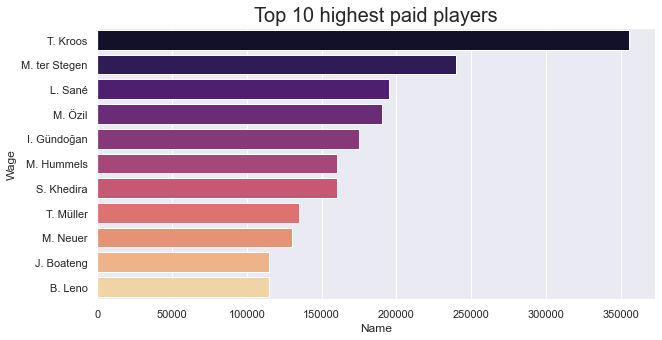

In [6]:
plt.figure(figsize=(10,5))
sns.set()
sns.barplot(x = maxEarners['Wage'], y = maxEarners.index,  palette = 'magma')
plt.title('Top 10 highest paid players', fontsize = 20)
plt.xlabel('Name', fontsize =12)
plt.ylabel('Wage', fontsize =12)

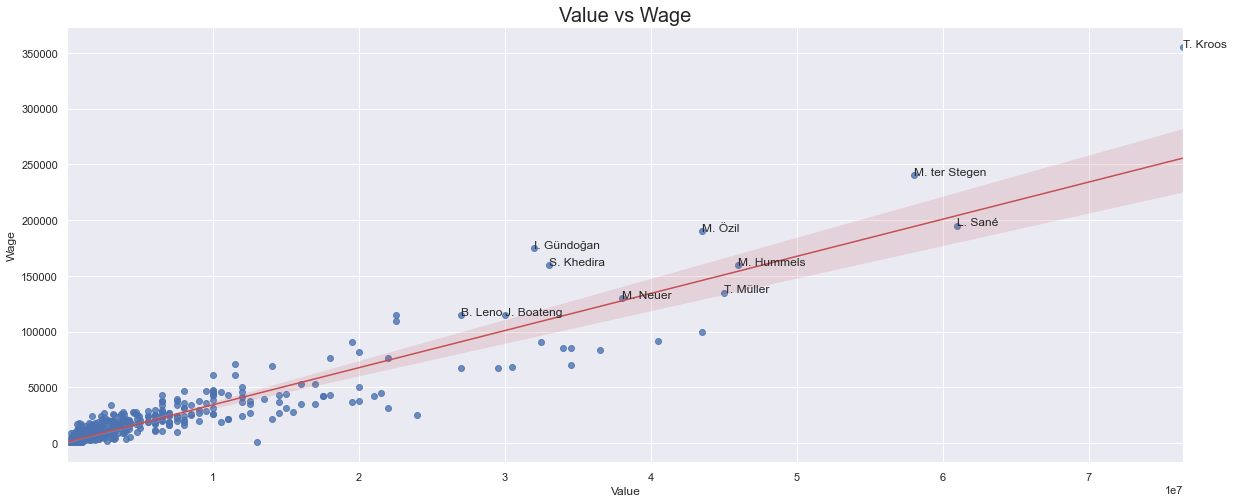

In [7]:
plt.figure(figsize=(20,8))
labels = maxEarners.index
ax = sns.regplot(x = 'Value', y = 'Wage' , data = df,
            line_kws={"color":"r","alpha":1,"lw":1.5})
plt.title('Value vs Wage', fontsize = 20)

for i, label in enumerate(labels):
    ax.annotate(label, (maxEarners['Value'][i],maxEarners['Wage'][i]))

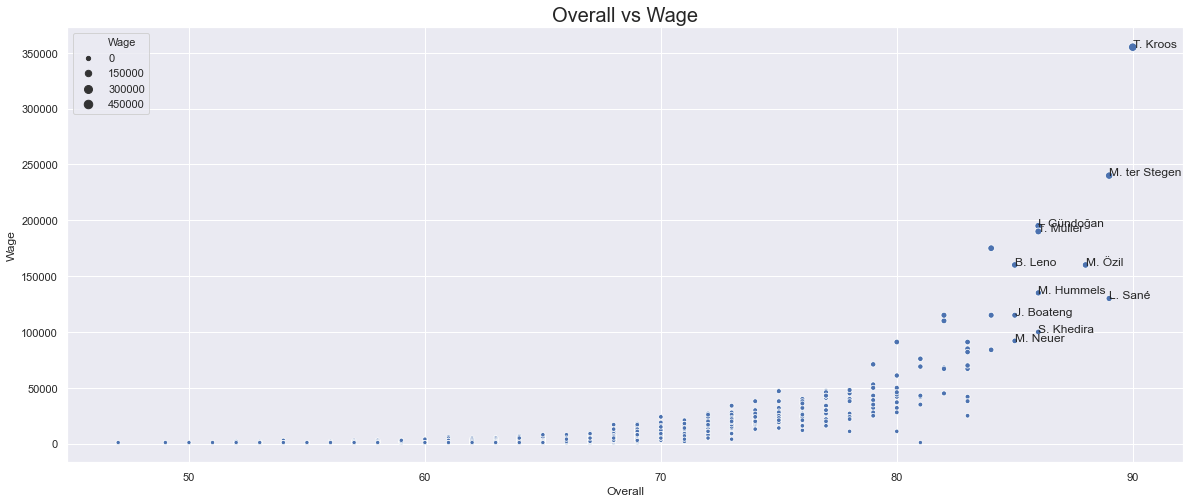

In [8]:
plt.figure(figsize=(20,8))
labels = maxEarners.index
ax = sns.scatterplot(x = 'Overall', y = 'Wage' , data = df, size='Wage')
plt.title('Overall vs Wage', fontsize = 20)

for i, label in enumerate(labels):
    ax.annotate(label, (df['Overall'][i],df['Wage'][i]))

Text(0.5, 1.0, 'Wage vs Position Class')

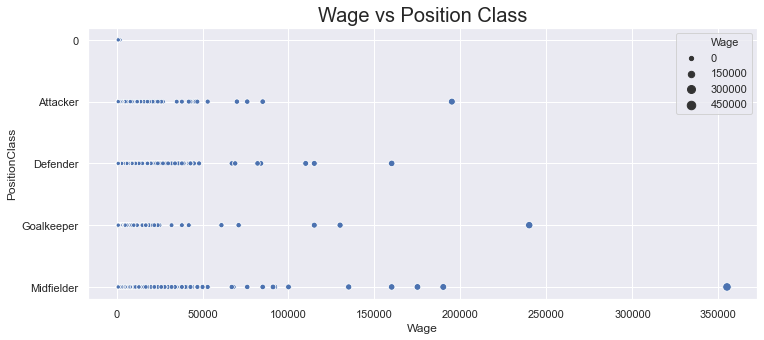

In [9]:
plt.figure(figsize=(12,5))
labels = maxEarners.index
ax = sns.scatterplot(x = 'Wage', y = 'PositionClass' , data = df,size='Wage')
plt.title('Wage vs Position Class', fontsize = 20)

In [10]:
cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Skill Moves','Dribbling', 'Curve',
      'FKAccuracy', 'LongPassing', 'BallControl', 'Agility', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
      'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Reactions', 'Aggression',
      'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle',
      'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
i=0
while i < len(cols):
    print('Best {0} : {1}'.format(cols[i],df.loc[df[cols[i]].idxmax()][0]))
    i += 1

Best Crossing : P. Max
Best Finishing : T. Müller
Best HeadingAccuracy : M. Hummels
Best ShortPassing : T. Kroos
Best Volleys : M. Reus
Best Skill Moves : B. Manu
Best Dribbling : L. Sané
Best Curve : J. Geis
Best FKAccuracy : T. Kroos
Best LongPassing : T. Kroos
Best BallControl : T. Kroos
Best Agility : S. Bigalke
Best Acceleration : L. Sané
Best SprintSpeed : L. Sané
Best Agility : S. Bigalke
Best Reactions : T. Müller
Best Balance : L. Ayçiçek
Best ShotPower : L. Podolski
Best Jumping : R. Gosens
Best Stamina : M. Eggestein
Best Strength : N. Süle
Best LongShots : T. Kroos
Best Reactions : T. Müller
Best Aggression : D. Erdmann
Best Interceptions : M. Hummels
Best Positioning : T. Müller
Best Vision : M. Özil
Best Penalties : M. Kruse
Best Composure : M. Hummels
Best Marking : M. Hummels
Best StandingTackle : M. Hummels
Best SlidingTackle : M. Hummels
Best GKDiving : M. Neuer
Best GKHandling : M. Neuer
Best GKKicking : M. Neuer
Best GKPositioning : M. Neuer
Best GKReflexes : M. ter

In [11]:
target = "Overall"
predictors = list(df.columns)
for r in [target,"Name","Age","Nationality","Position","Weak Foot","Preferred Foot", "Work Rate"]:
  predictors.remove(r)
#print(target,predictors)

In [12]:
def numColumns(col):
    if type(list(df[col])[0]) == float:
        return col

numberPreds = []

for c in df.columns:
    temp = numColumns(c)
    if temp != None:
        numberPreds.append(temp)

#numberPreds

In [13]:
scaler = StandardScaler()
numberPreds.append(target)
# print(predictors,target)
scaled_df = pd.DataFrame(data=scaler.fit_transform(df[numberPreds]),columns=numberPreds)

numberPreds.remove(target)

X = scaled_df[numberPreds]
y = scaled_df[target]

print(X.shape,y.shape)

(1198, 40) (1198,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state= 1)
mlpReg = MLPRegressor(max_iter=150,verbose=1)
mlpReg.fit(X_train.values,y_train.values)

Iteration 1, loss = 0.43307125
Iteration 2, loss = 0.28189994
Iteration 3, loss = 0.20912602
Iteration 4, loss = 0.19244687
Iteration 5, loss = 0.16932525
Iteration 6, loss = 0.14733019
Iteration 7, loss = 0.15096355
Iteration 8, loss = 0.13631469
Iteration 9, loss = 0.12278184
Iteration 10, loss = 0.11321044
Iteration 11, loss = 0.10928382
Iteration 12, loss = 0.11047342
Iteration 13, loss = 0.09484948
Iteration 14, loss = 0.08533536
Iteration 15, loss = 0.08197444
Iteration 16, loss = 0.07880536
Iteration 17, loss = 0.07398960
Iteration 18, loss = 0.07103637
Iteration 19, loss = 0.06908999
Iteration 20, loss = 0.06581478
Iteration 21, loss = 0.06535461
Iteration 22, loss = 0.07439862
Iteration 23, loss = 0.06379415
Iteration 24, loss = 0.06098461
Iteration 25, loss = 0.07264546
Iteration 26, loss = 0.06492731
Iteration 27, loss = 0.05442570
Iteration 28, loss = 0.05381794
Iteration 29, loss = 0.05361592
Iteration 30, loss = 0.05273389
Iteration 31, loss = 0.05110191
Iteration 32, los

MLPRegressor(max_iter=150, verbose=1)

In [19]:
preds = mlpReg.predict(X_test)
score = r2_score(y_test,preds)
print(score)

0.9413862834344888


In [20]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
preds_lr = lr.predict(X_test)
score_lr = r2_score(y_test,preds_lr)
print(score_lr)

0.853219823295739


In [25]:
random = RandomForestRegressor(n_jobs=-1, n_estimators=100)
random.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [27]:
preds_rf = random.predict(X_test)
#0.0 is best possible score from MAE
print ('Mean-Absolute-Error: {}'.format(mean_absolute_error(y_test,preds_rf)))
#This is the weighted variance in our calculations 1.0 is maximum
print ('R2 score: {}'.format(r2_score(y_test,preds_rf)))

Mean-Absolute-Error: 0.13472165035537623
R2 score: 0.9672147123088128
